<a href="https://colab.research.google.com/github/zasminah/Python_MachineLearning/blob/main/MNIST_Fashion_MNIST_EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Fashion_MNIST = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test,y_test) = Fashion_MNIST.load_data()

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
plt.figure(figsize=(6,6))
for i in range(25):
  plt.subplot(5,5,1+i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(300, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_data=(x_train,y_train))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5977 - accuracy: 0.7901 - val_loss: 0.3506 - val_accuracy: 0.8735
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3643 - accuracy: 0.8662 - val_loss: 0.3245 - val_accuracy: 0.8812
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3322 - accuracy: 0.8770 - val_loss: 0.2809 - val_accuracy: 0.8964
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3019 - accuracy: 0.8874 - val_loss: 0.2705 - val_accuracy: 0.8991
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2827 - accuracy: 0.8957 - val_loss: 0.2650 - val_accuracy: 0.9020


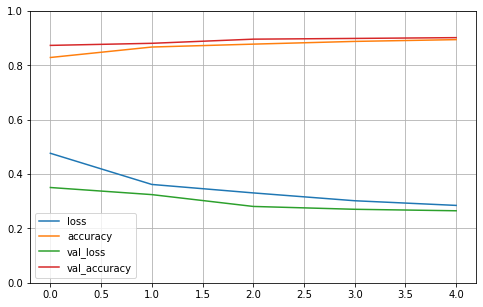

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.3407 - accuracy: 0.8735


[0.3407403230667114, 0.8734999895095825]

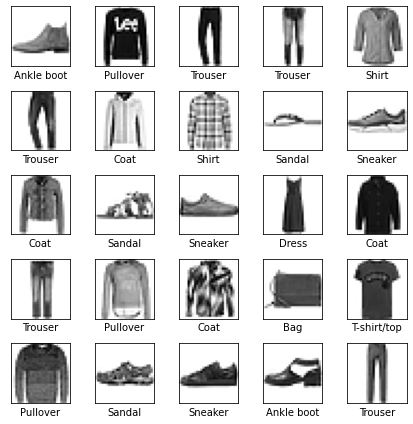

In [16]:
plt.figure(figsize=(6,6))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_test[i]])
plt.tight_layout()
plt.show()

In [19]:
predict = model.predict(x_test)
print(predict.round(2))

[[0.   0.   0.   ... 0.04 0.   0.96]
 [0.   0.   0.97 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [21]:
def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    #thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    thisplot[predicted_label].set_color('red')

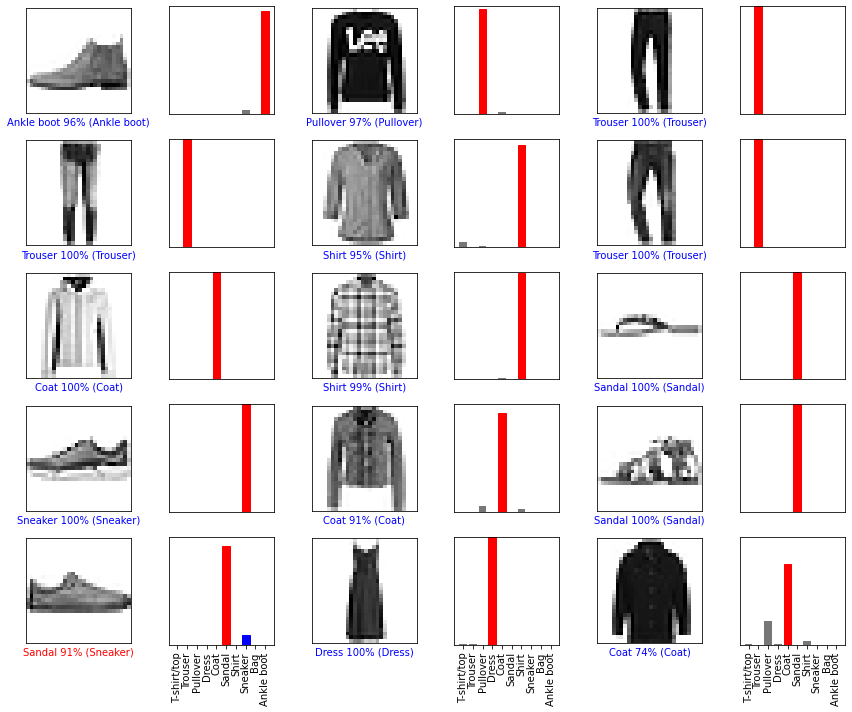

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows)) 
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predict, y_test, x_test, class_names)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predict, y_test)
    if i >= (num_rows-1)*3: # display x-axis at last row only
        _ = plt.xticks(range(10), class_names, rotation=90)
plt.tight_layout()
plt.show()